In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap

## Read

In [2]:
names = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
         'IMDb_URL','unknown','Action','Adventure','Animation',
         'Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
         'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
         'Thriller','War','Western']

In [3]:
data = pd.read_csv('movielens.txt', sep='|', names=names)

In [4]:
X = data.set_index('movie_title', drop=True)\
            .drop(['movie_id', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown'], axis=1)   

In [5]:
X.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [68]:
X.shape

(1682, 18)

## PCA

In [6]:
pca = PCA(n_components=5)

In [7]:
X_pca = pca.fit_transform(X)

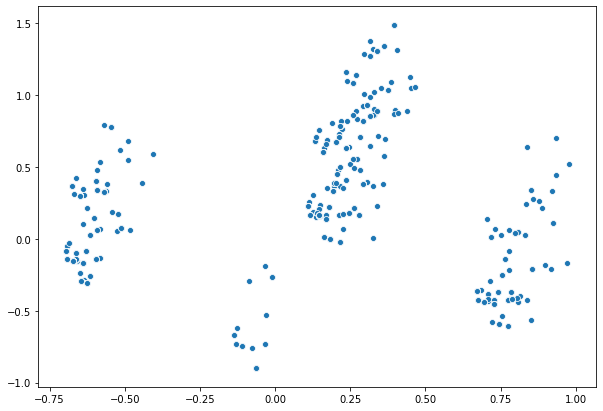

In [10]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("bright", 10)  #Choosing color
sns.scatterplot(X_pca[:,0], X_pca[:,1], palette=palette);

In [11]:
pca.explained_variance_ratio_

array([0.23178038, 0.17385512, 0.09304758, 0.08820414, 0.07725641])

## Umap

In [12]:
umap_ = umap.UMAP()
X_umap = umap_.fit_transform(X)

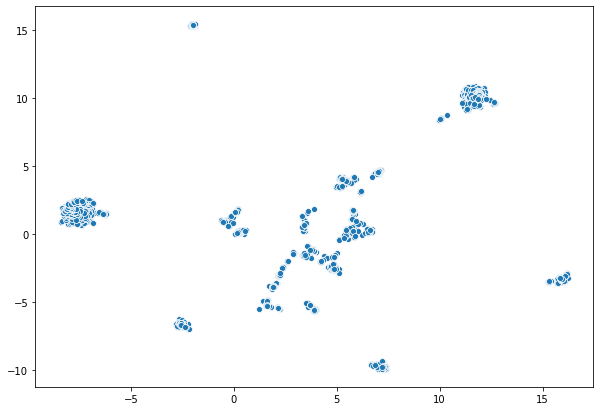

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(X_umap[:,0], X_umap[:,1], palette=palette);

## TSNE

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne=TSNE()

In [16]:
X_tsne = tsne.fit_transform(X)

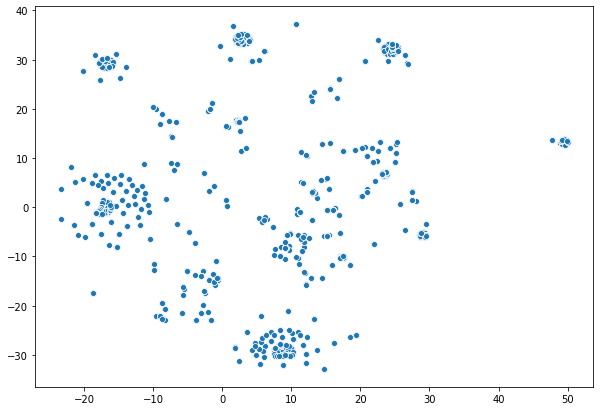

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], palette=palette);

## K-Means

In [27]:
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider, fixed, FloatSlider

In [37]:
crit = []

for k in range(2, 100):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    crit.append(np.sqrt(kmeans.inertia_))

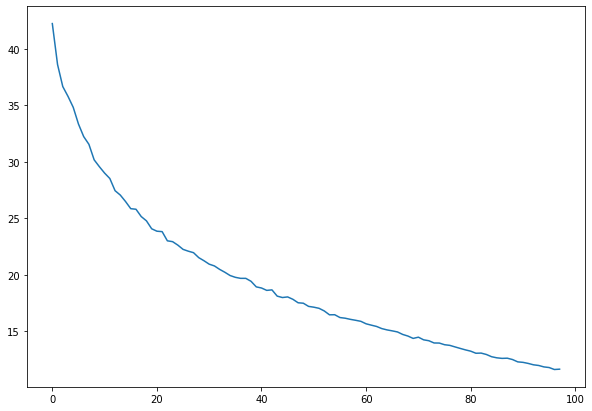

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(crit);
plt.xlabel('')

In [58]:
kmeans = KMeans(n_clusters=40, random_state=1).fit(X)

In [59]:
kmeans.labels_

array([39, 12,  7, ..., 19,  3,  2], dtype=int32)

Text(0.5, 1.0, 'PCA')

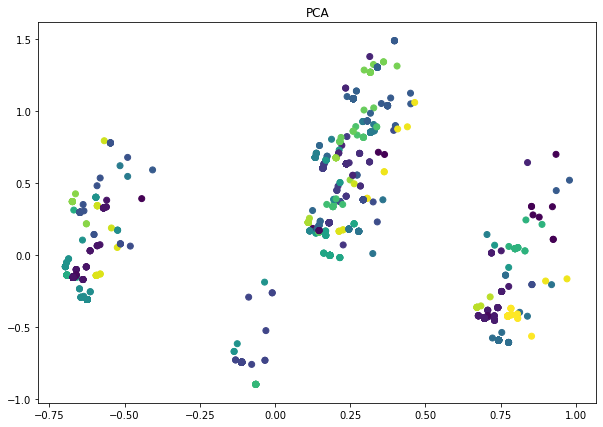

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
plt.title('PCA')

Text(0.5, 1.0, 'Umap')

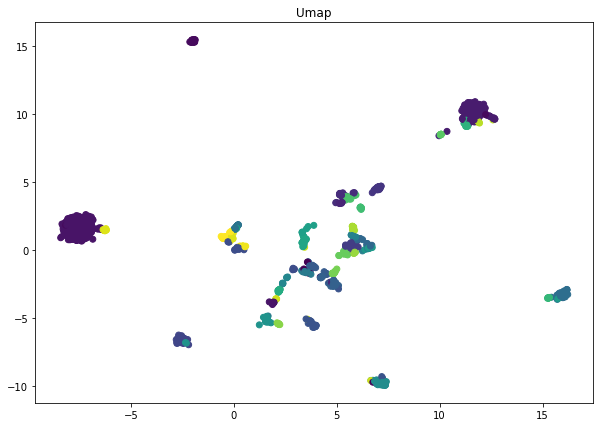

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:,0], X_umap[:,1], c=kmeans.labels_)
plt.title('Umap')

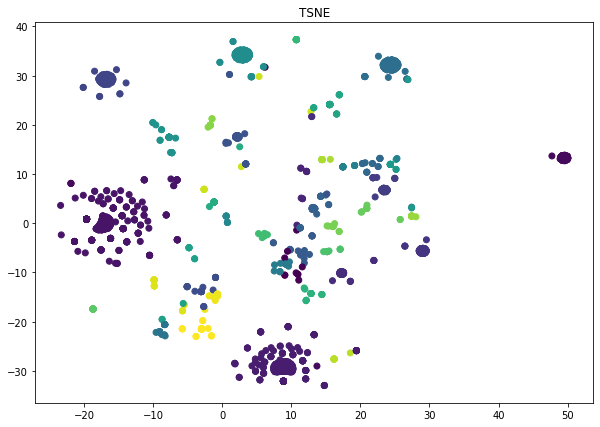

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_);
plt.title('TSNE');

## Hierarchy

In [65]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [83]:
X_sample = X.sample(50)

In [86]:
Z = linkage(X_sample, method='single', metric='euclidean')

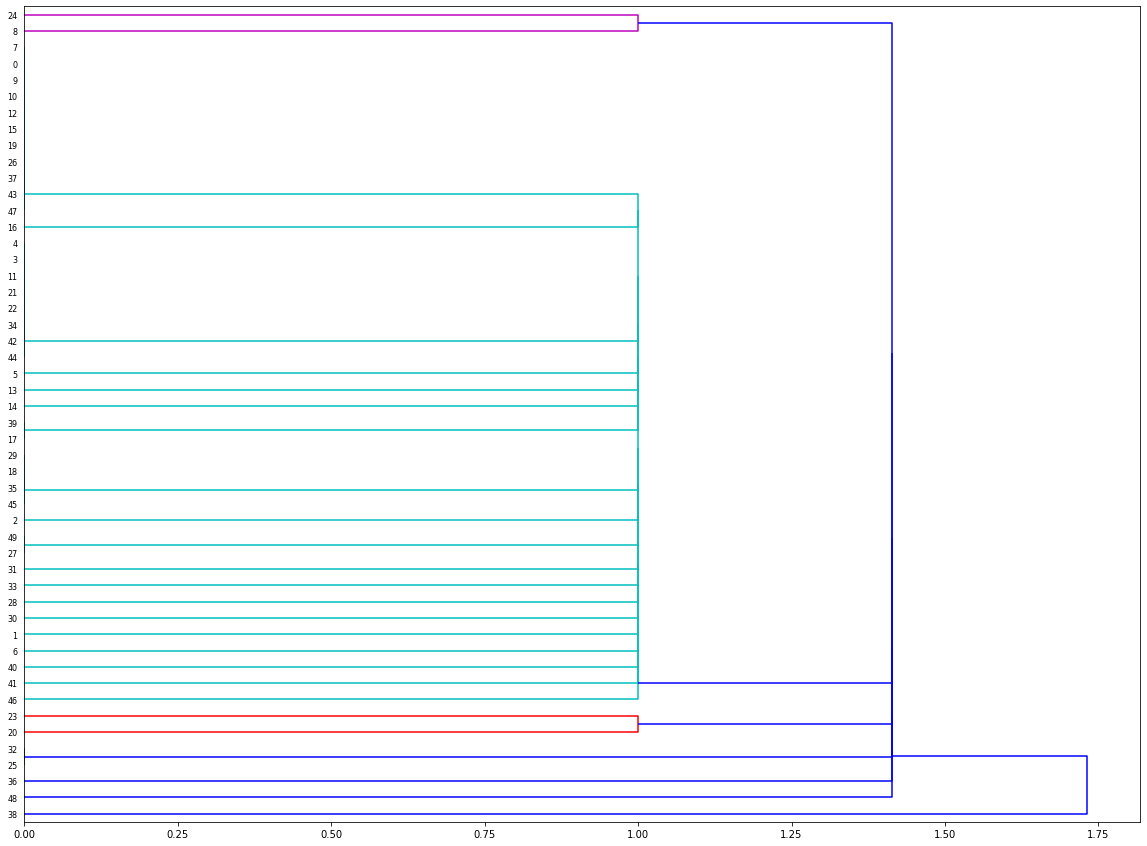

In [88]:
plt.figure(figsize=(20, 15))
dend = dendrogram(Z, orientation='right')

## DBSCAN

In [90]:
from sklearn.cluster import DBSCAN

In [100]:
X.shape

(1682, 18)

In [103]:
X_sample = X.sample(200)

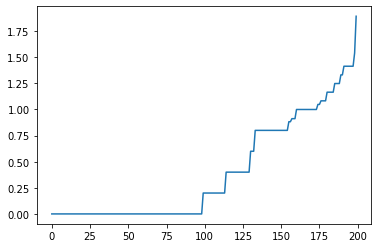

In [104]:
neighbours=[]

for v1 in X_sample.iterrows():
    neighbours.append(np.mean(sorted([np.linalg.norm(v1[1]-v2[1]) for v2 in X_sample.iterrows()])[1:6]))
neighbours=sorted(neighbours)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()

In [111]:
db = DBSCAN(eps=0.9, min_samples=3)
cl = db.fit_predict(X)+1

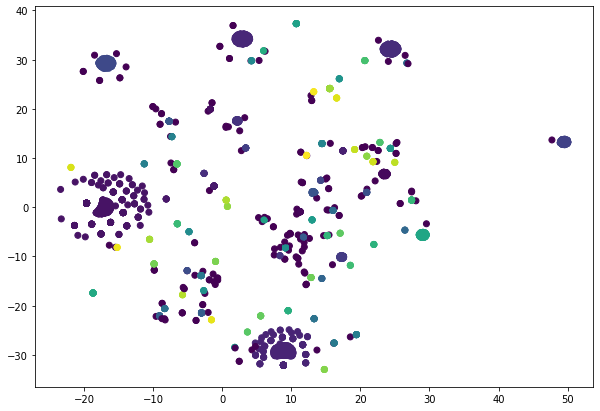

In [112]:
plt.figure(figsize=(10, 7))
plt.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=cl+1);